In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

In [2]:
dataset = pd.read_csv("sms_spam_detection.csv",sep = "\t",names = ['label','message'])

In [3]:
dataset

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [5]:
dataset.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [6]:
dataset['label'] = dataset['label'].map({'ham' : 0, 'spam' : 1})

In [7]:
dataset

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [8]:
dataset.describe()

,label
count,5572.000000
mean,0.134063
std,0.340751
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

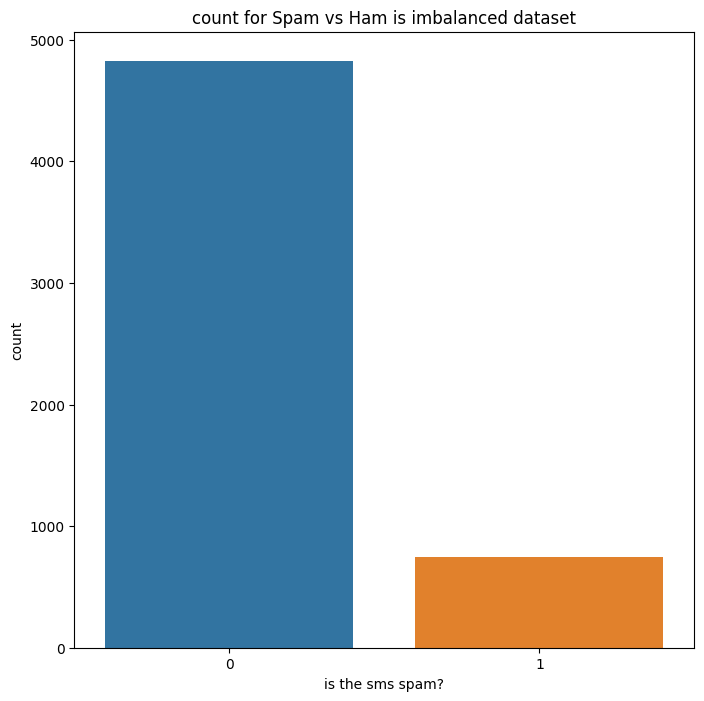

In [10]:
plt.figure(figsize=(8,8))
p = sns.countplot(x='label',data = dataset)
p = plt.title('count for Spam vs Ham is imbalanced dataset')
p = plt.xlabel('is the sms spam?')
p = plt.ylabel('count')

In [11]:
only_spam = dataset[dataset['label']== 1]
only_spam

,label,message
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
5,1,FreeMsg Hey there darling it's been 3 week's n...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...
11,1,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,1,Had your contract mobile 11 Mnths? Latest Moto...
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...


In [12]:
dataset.shape

(5572, 2)

In [13]:
count = int((dataset.shape[0] - only_spam.shape[0]) / only_spam.shape[0])

In [14]:
count

6

In [15]:
for i in range(0, count-1):
    dataset = pd.concat([dataset, only_spam])

In [16]:
dataset

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,1,Had your contract mobile 11 Mnths? Latest Moto...
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...


In [17]:
dataset.reset_index()

,index,label,message
0,0,0,"Go until jurong point, crazy.. Available only ..."
1,1,0,Ok lar... Joking wif u oni...
2,2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,3,0,U dun say so early hor... U c already then say...
4,4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...,...
9302,5537,1,Want explicit SEX in 30 secs? Ring 02073162414...
9303,5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
9304,5547,1,Had your contract mobile 11 Mnths? Latest Moto...
9305,5566,1,REMINDER FROM O2: To get 2.50 pounds free call...


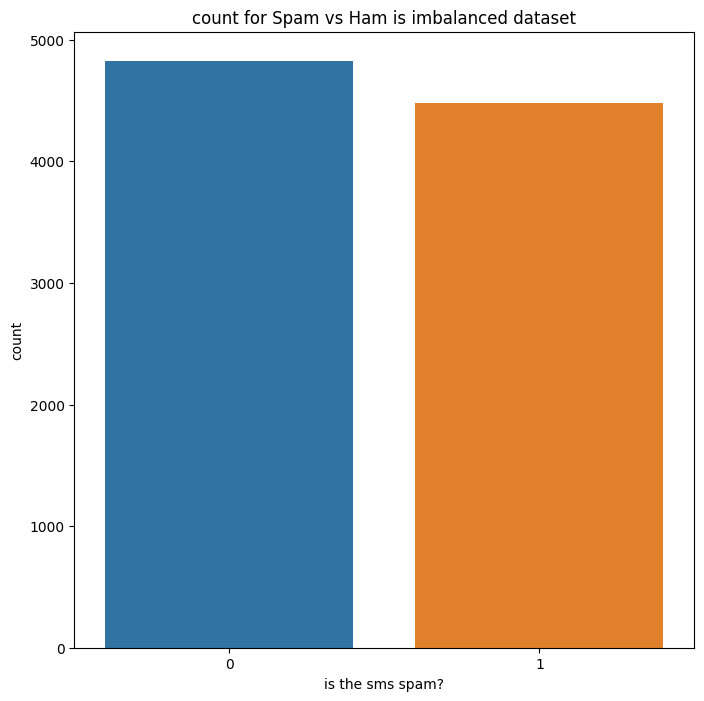

In [18]:
plt.figure(figsize=(8,8))
p = sns.countplot(x='label',data = dataset)
p = plt.title('count for Spam vs Ham is imbalanced dataset')
p = plt.xlabel('is the sms spam?')
p = plt.ylabel('count')

In [19]:
dataset['word_count'] = dataset['message'].apply(lambda x: len(x.split()))

In [20]:
dataset

,label,message,word_count
0,0,"Go until jurong point, crazy.. Available only ...",20
1,0,Ok lar... Joking wif u oni...,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28
3,0,U dun say so early hor... U c already then say...,11
4,0,"Nah I don't think he goes to usf, he lives aro...",13
...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,16
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,33
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,28
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,28


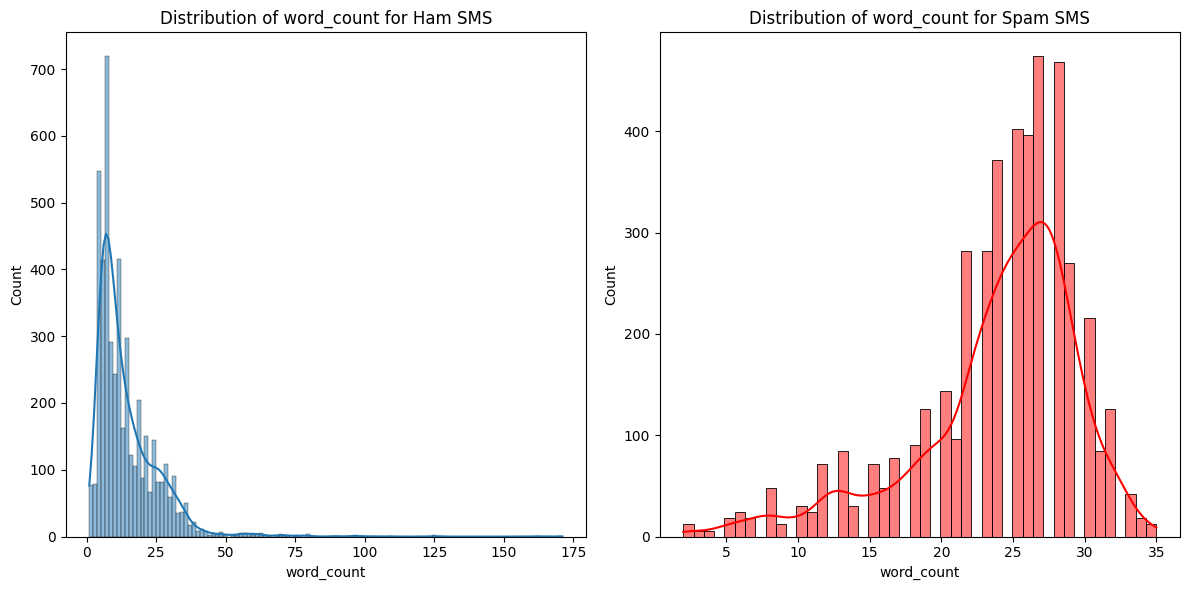

In [21]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
g = sns.histplot(dataset[dataset['label'] == 0].word_count, kde = True)
p = plt.title('Distribution of word_count for Ham SMS')
plt.subplot(1,2,2)
g = sns.histplot(dataset[dataset['label'] == 1].word_count, color = 'red', kde = True)
p = plt.title('Distribution of word_count for Spam SMS')
plt.tight_layout()
plt.show()


In [22]:
def currency(data):
    currency_symbols = ['$' , '€' , '¥' , '₹' , '£']
    for i in currency_symbols:
        if i in data:
            return 1
    return 0

In [23]:
dataset['contains_currency_symbol'] = dataset['message'].apply(currency)

In [24]:
dataset

,label,message,word_count,contains_currency_symbol
0,0,"Go until jurong point, crazy.. Available only ...",20,0
1,0,Ok lar... Joking wif u oni...,6,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28,0
3,0,U dun say so early hor... U c already then say...,11,0
4,0,"Nah I don't think he goes to usf, he lives aro...",13,0
...,...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,16,0
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,33,1
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,28,0
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,28,0


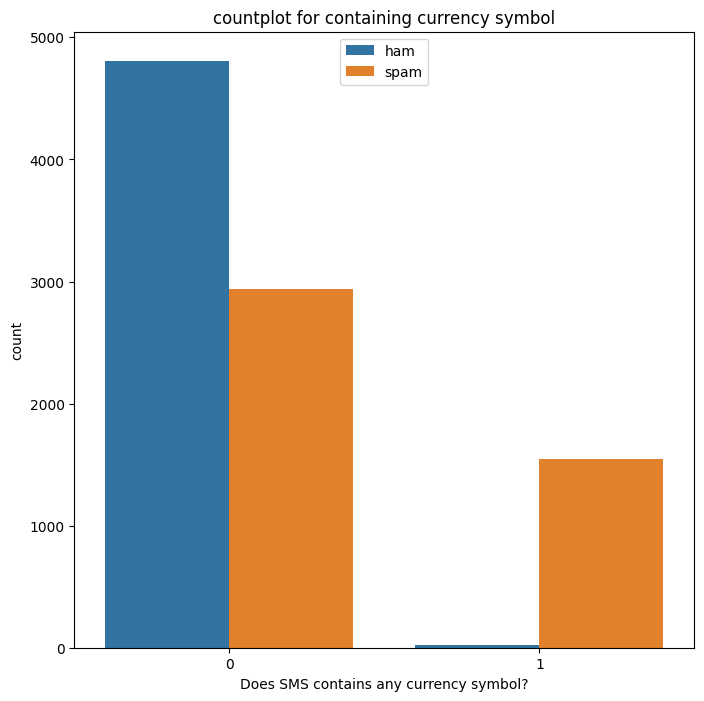

In [25]:
plt.figure(figsize=(8,8))
p = sns.countplot(x='contains_currency_symbol',data = dataset, hue = 'label')
p = plt.title('countplot for containing currency symbol')
p = plt.xlabel('Does SMS contains any currency symbol?')
p = plt.ylabel('count')
plt.legend(labels=['ham','spam'], loc = 9)

In [26]:
def number(data):
    for i in data:
        if ord(i) >= 48 and ord(i) <=57:
            return 1
    return 0

In [27]:
dataset['contains_number'] = dataset['message'].apply(number)

In [28]:
dataset

,label,message,word_count,contains_currency_symbol,contains_number
0,0,"Go until jurong point, crazy.. Available only ...",20,0,0
1,0,Ok lar... Joking wif u oni...,6,0,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28,0,1
3,0,U dun say so early hor... U c already then say...,11,0,0
4,0,"Nah I don't think he goes to usf, he lives aro...",13,0,0
...,...,...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,16,0,1
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,33,1,1
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,28,0,1
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,28,0,1


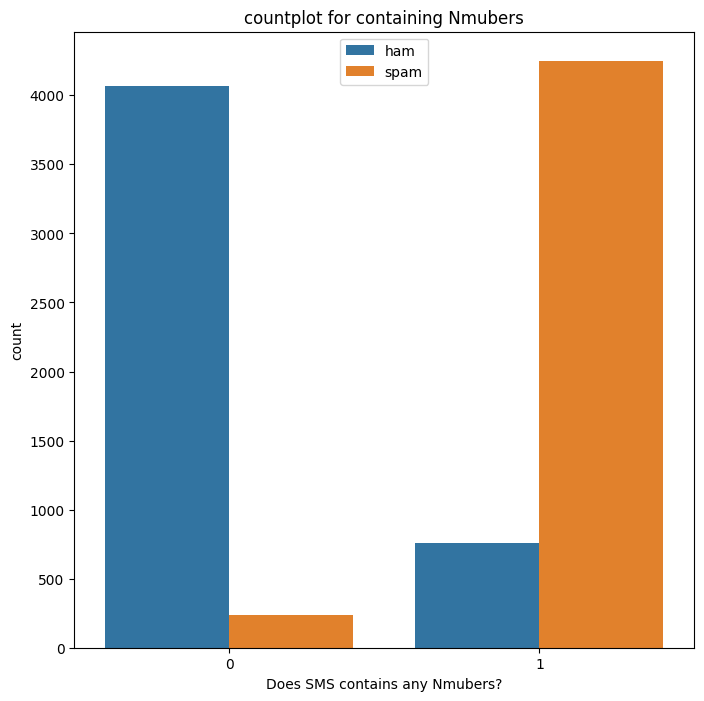

In [29]:
plt.figure(figsize=(8,8))
p = sns.countplot(x='contains_number',data = dataset, hue = 'label')
p = plt.title('countplot for containing Nmubers')
p = plt.xlabel('Does SMS contains any Nmubers?')
p = plt.ylabel('count')
plt.legend(labels=['ham','spam'], loc = 9)

In [30]:
# Data Cleaning

import nltk
import re
nltk.download('stopwords')
nltk.download('wordnet')

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Srija\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Srija\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [31]:
corpus = []
wnl = WordNetLemmatizer()

for sms in list(dataset.message):
    # Filtering out special characters and numbers
    message = re.sub(pattern='[^a-zA-Z]', repl=' ', string=sms)

    # Converting to lowercase
    message = message.lower()

    # Tokenizing the message
    words = message.split()

    # Removing stop words
    filtered_words = [word for word in words if word not in set(stopwords.words('english'))]

    # Lemmatizing the words
    lemm_words = [wnl.lemmatize(word) for word in filtered_words]

    # Joining the words back into a message
    message = ' '.join(lemm_words)

    # Adding the message to the corpus
    corpus.append(message)

In [32]:
corpus

['go jurong point crazy available bugis n great world la e buffet cine got amore wat',
 'ok lar joking wif u oni',
 'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply',
 'u dun say early hor u c already say',
 'nah think go usf life around though',
 'freemsg hey darling week word back like fun still tb ok xxx std chgs send rcv',
 'even brother like speak treat like aid patent',
 'per request melle melle oru minnaminunginte nurungu vettam set callertune caller press copy friend callertune',
 'winner valued network customer selected receivea prize reward claim call claim code kl valid hour',
 'mobile month u r entitled update latest colour mobile camera free call mobile update co free',
 'gonna home soon want talk stuff anymore tonight k cried enough today',
 'six chance win cash pound txt csh send cost p day day tsandcs apply reply hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw'

In [33]:
# creating the Bag of words model
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=500)
vectors = tfidf.fit_transform(corpus).toarray()
feature_names = tfidf.get_feature_names_out()

In [34]:
X = pd.DataFrame(vectors, columns=feature_names)
Y = dataset['label']

In [35]:
X

,ac,access,account,address,admirer,age,already,also,always,amp,...,xxx,ya,yeah,year,yes,yesterday,yet,yo,yr,yup
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.4117,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9302,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
9303,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.326017,0.0,0.0,0.0,0.0,0.0
9304,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.287064,0.0,0.0,0.0,0.0,0.0
9305,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [36]:
Y

0       0
1       0
2       1
3       0
4       0
       ..
5537    1
5540    1
5547    1
5566    1
5567    1
Name: label, Length: 9307, dtype: int64

In [37]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [38]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
X_train

,ac,access,account,address,admirer,age,already,also,always,amp,...,xxx,ya,yeah,year,yes,yesterday,yet,yo,yr,yup
7572,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1480,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.323959,0.0
6163,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
9100,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
9244,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
5191,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
5390,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
860,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [39]:
# Naive Bayes Model
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()

# Cross-Validate the Model
CV = cross_val_score (mnb, X, Y, scoring='f1', cv=10)
print (round (CV.mean(), 3))
print (round (CV.std(),3))

0.943
0.004


In [40]:
# Train the Model
mnb.fit(X_train, Y_train)

# Predict on the Test Set
Y_pred = mnb.predict(X_test)

In [41]:
Y_test

1155    0
1790    0
3003    0
1122    1
592     1
       ..
2697    0
3424    1
2177    0
3991    1
2579    0
Name: label, Length: 2327, dtype: int64

In [42]:
Y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

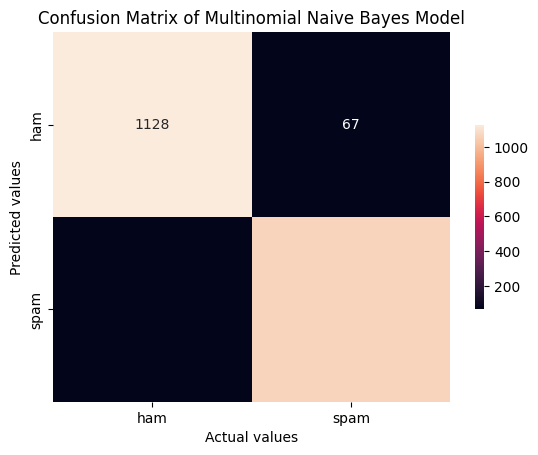

In [56]:
# Generate a Confusion Matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(Y_test, Y_pred)
axis_labels = ['ham', 'spam']
g = sns.heatmap(data=cm, xticklabels=axis_labels, yticklabels=axis_labels, annot=True, fmt='g', cbar_kws={"shrink": 0.5})
p = plt.title("Confusion Matrix of Multinomial Naive Bayes Model")
p = plt.xlabel('Actual values')
P = plt.ylabel("Predicted values")
plt.show()


In [45]:
print(classification_report(Y_pred, Y_test))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1197
           1       0.94      0.94      0.94      1130

    accuracy                           0.94      2327
   macro avg       0.94      0.94      0.94      2327
weighted avg       0.94      0.94      0.94      2327



In [46]:
cm = confusion_matrix(Y_test, Y_pred)
cm

array([[1128,   67],
       [  69, 1063]], dtype=int64)

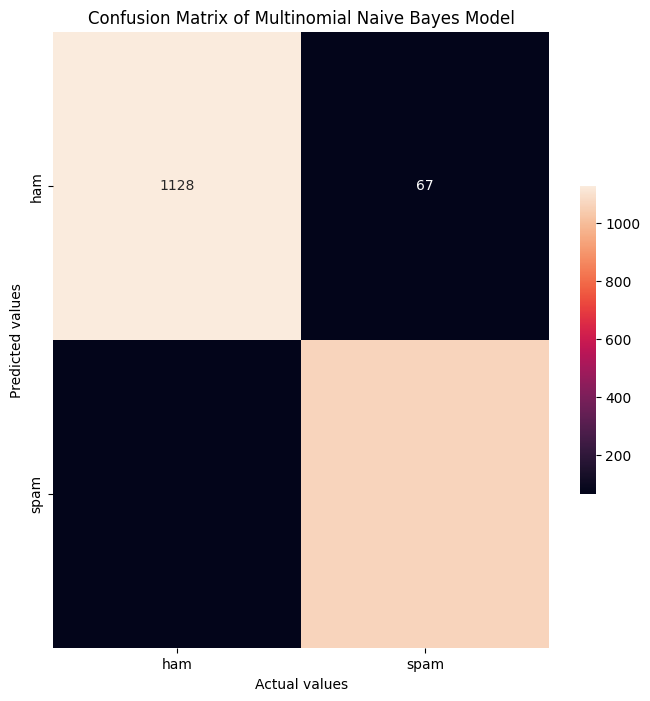

In [47]:
plt.figure(figsize=(8,8))
axis_labels = ['ham', 'spam']
g = sns.heatmap(data=cm, xticklabels=axis_labels, yticklabels=axis_labels, annot=True, fmt='g', cbar_kws={"shrink": 0.5})
p = plt.title("Confusion Matrix of Multinomial Naive Bayes Model")
p = plt.xlabel('Actual values')
P = plt.ylabel("Predicted values")

In [48]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

# Cross-Validate the Model
cv1 = cross_val_score (dt, X, Y, scoring='f1', cv=10)
print (round (cv1.mean(), 3))
print (round (cv1.std(),3))


0.98
0.004


In [49]:
dt.fit(X_train, Y_train)

# Predict on the Test Set
Y_pred1= dt.predict(X_test)

In [50]:
print (classification_report(Y_test, Y_pred1))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1195
           1       0.97      0.99      0.98      1132

    accuracy                           0.98      2327
   macro avg       0.98      0.98      0.98      2327
weighted avg       0.98      0.98      0.98      2327



In [51]:
cm = confusion_matrix(Y_test, Y_pred)
cm

array([[1128,   67],
       [  69, 1063]], dtype=int64)

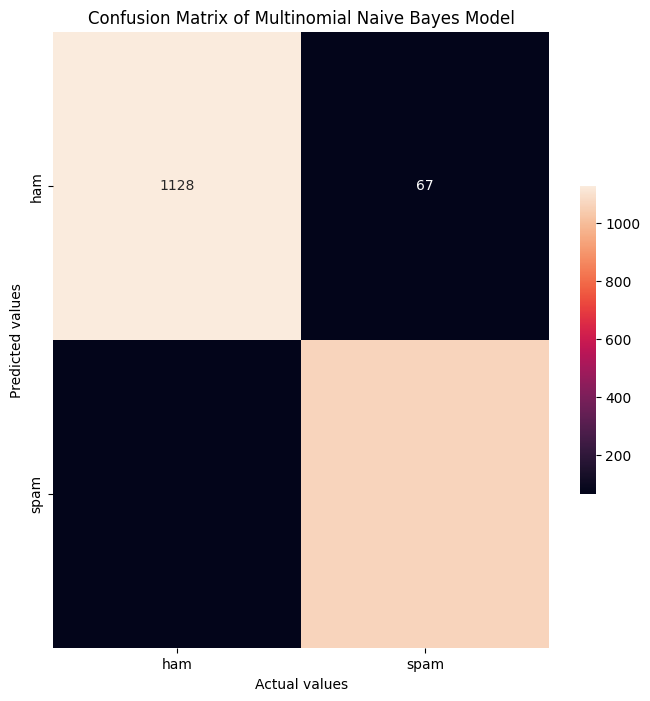

In [52]:

plt.figure(figsize=(8,8))
axis_labels = ['ham', 'spam']
g = sns.heatmap(data=cm, xticklabels=axis_labels, yticklabels=axis_labels, annot=True, fmt='g', cbar_kws={"shrink": 0.5})
p = plt.title("Confusion Matrix of Multinomial Naive Bayes Model")
p = plt.xlabel('Actual values')
P = plt.ylabel("Predicted values")


In [53]:
def predict_spam(sms):
  # Remove punctuation
    message = re.sub(pattern='[^a-zA-Z]', repl=' ', string=sms)

  # Convert to lowercase
    message = message.lower()

  # Tokenize the message
    words = message.split()

    filtered_words = [word for word in words if word not in set(stopwords.words('english'))]
    
    lemm_words = [wnl.lemmatize(word) for word in filtered_words]

  # Join the words back into a message
    message = ' '.join(lemm_words)
    temp = tfidf.transform([message]).toarray()
    return dt.predict(temp)

In [54]:
sms = "Congratulations! You've won a $1000 gift card. Click the link to claim your prize now: http://example.com/claim"
from sklearn.metrics import accuracy_score

# Calculate accuracy for the Naive Bayes model
naive_bayes_accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy of Multinomial Naive Bayes Model: {naive_bayes_accuracy * 100:.2f}%")

# Calculate accuracy for the Decision Tree model
decision_tree_accuracy = accuracy_score(Y_test, Y_pred1)
print(f"Accuracy of Decision Tree Model: {decision_tree_accuracy * 100:.2f}%")

if predict_spam(sms):
    print('This is a SPAM message!!')
else:
    print('This is a HAM (normal) message.')

Accuracy of Multinomial Naive Bayes Model: 94.16%
Accuracy of Decision Tree Model: 98.20%
This is a SPAM message!!


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
